In [39]:
# Import packages
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns


In [40]:
stock_detail = pd.read_csv('data_stock_info.csv', sep='|')
stock_detail.head()

,stock_name,stock_isin,stock_euronext_symbol,stock_exchange_markets,stock_trading_currency,main_city,yahoo_city_code,yahoo_code
0,1000MERCIS,FR0010285965,ALMIL,Euronext Growth Paris,EUR,Paris,PA,ALMIL.PA
1,2020 BULKERS,BMG9156K1018,2020,Oslo Børs,NOK,Oslo,OL,2020.OL
2,2CRSI,FR0013341781,2CRSI,Euronext Paris,EUR,Paris,PA,2CRSI.PA
3,2MX ORGANIC,FR0014000T90,2MX,Euronext Paris,EUR,Paris,PA,2MX.PA
4,2MX ORGANIC BS,FR0014000TB2,2MXBS,Euronext Paris,EUR,Paris,PA,2MXBS.PA


In [42]:
price_info = pd.read_csv('data_price_history.csv',
                         sep='|', index_col='date')
price_info.head()


,open_price,high_price,low_price,close_price,adjusted_close_price,trading_volume,yahoo_code,Dividends,Stock Splits
date,,,,,,,,,
2022-01-17,0.20,0.200,0.200,0.200,NaN,1200.0,2MXBS.PA,0.0,0.0
2020-12-09,13.06,13.060,10.200,10.550,NaN,307049.0,2MX.PA,0.0,0.0
2020-12-10,10.50,10.694,10.450,10.450,NaN,252700.0,2MX.PA,0.0,0.0
2020-12-11,10.60,10.688,10.420,10.448,NaN,83474.0,2MX.PA,0.0,0.0
2020-12-14,10.50,10.550,10.304,10.304,NaN,37071.0,2MX.PA,0.0,0.0


In [43]:
# Left join 
price_info = pd.merge(
    price_info, stock_detail, on='yahoo_code', how='left')
price_info.head()


,open_price,high_price,low_price,close_price,adjusted_close_price,trading_volume,yahoo_code,Dividends,Stock Splits,stock_name,stock_isin,stock_euronext_symbol,stock_exchange_markets,stock_trading_currency,main_city,yahoo_city_code
0,0.20,0.200,0.200,0.200,NaN,1200.0,2MXBS.PA,0.0,0.0,2MX ORGANIC BS,FR0014000TB2,2MXBS,Euronext Paris,EUR,Paris,PA
1,13.06,13.060,10.200,10.550,NaN,307049.0,2MX.PA,0.0,0.0,2MX ORGANIC,FR0014000T90,2MX,Euronext Paris,EUR,Paris,PA
2,10.50,10.694,10.450,10.450,NaN,252700.0,2MX.PA,0.0,0.0,2MX ORGANIC,FR0014000T90,2MX,Euronext Paris,EUR,Paris,PA
3,10.60,10.688,10.420,10.448,NaN,83474.0,2MX.PA,0.0,0.0,2MX ORGANIC,FR0014000T90,2MX,Euronext Paris,EUR,Paris,PA
4,10.50,10.550,10.304,10.304,NaN,37071.0,2MX.PA,0.0,0.0,2MX ORGANIC,FR0014000T90,2MX,Euronext Paris,EUR,Paris,PA


In [119]:
value_counts_accross_cities_and_exchange_euronext_extraction = stock_detail.groupby(['main_city', 'stock_exchange_markets'], as_index=False)[
    'stock_isin'].nunique().rename(columns={'stock_isin': 'euronext_coverage'})
value_counts_accross_cities_and_exchange_yahoo_finance_extraction = price_info.groupby(['main_city', 'stock_exchange_markets'], as_index=False)[
    'stock_isin'].nunique().rename(columns={'stock_isin': 'yahoo_finance_coverage'})
df = pd.merge(
    value_counts_accross_cities_and_exchange_euronext_extraction, 
    value_counts_accross_cities_and_exchange_yahoo_finance_extraction[['stock_exchange_markets', 'yahoo_finance_coverage']], 
    on='stock_exchange_markets', how='left').fillna(0)
df['data_gap'] = df['euronext_coverage'] - df['yahoo_finance_coverage']
df

,main_city,stock_exchange_markets,euronext_coverage,yahoo_finance_coverage,data_gap
0,Amsterdam,Euronext Amsterdam,168,142.0,26.0
1,Amsterdam,"Euronext Amsterdam, Brussels",5,5.0,0.0
2,Amsterdam,"Euronext Amsterdam, Brussels, Paris",1,1.0,0.0
3,Amsterdam,"Euronext Amsterdam, Paris",3,3.0,0.0
4,Brussels,Euronext Access Brussels,7,6.0,1.0
5,Brussels,Euronext Brussels,117,109.0,8.0
6,Brussels,"Euronext Brussels, Amsterdam",6,6.0,0.0
7,Brussels,"Euronext Brussels, Paris",7,6.0,1.0
8,Brussels,Euronext Growth Brussels,5,4.0,1.0
9,Brussels,Traded not listed Brussels,26,21.0,5.0


In [111]:
# Get differences on a city level
value_counts_accross_cities_yahoo_finance_extraction = price_info.groupby('main_city', as_index=False)[
    'stock_isin'].nunique().rename(columns={'main_city': 'City', 'stock_isin': 'Yahoo Finance'})
value_counts_accross_cities_euronext_extraction = stock_detail.groupby('main_city', as_index=False)[
    'stock_isin'].nunique().rename(columns={'main_city': 'City', 'stock_isin': 'Euronext'})
df = pd.merge(
    value_counts_accross_cities_euronext_extraction, value_counts_accross_cities_yahoo_finance_extraction, on='City', how='left').fillna(0)
df['Data Gap'] = df['Euronext'] - df['Yahoo Finance']
df

,City,Euronext,Yahoo Finance,Data Gap
0,Amsterdam,177,151.0,26.0
1,Brussels,168,152.0,16.0
2,Dublin,47,46.0,1.0
3,Lisbon,55,48.0,7.0
4,No city mentioned,100,0.0,100.0
5,Oslo,344,322.0,22.0
6,Paris,899,831.0,68.0


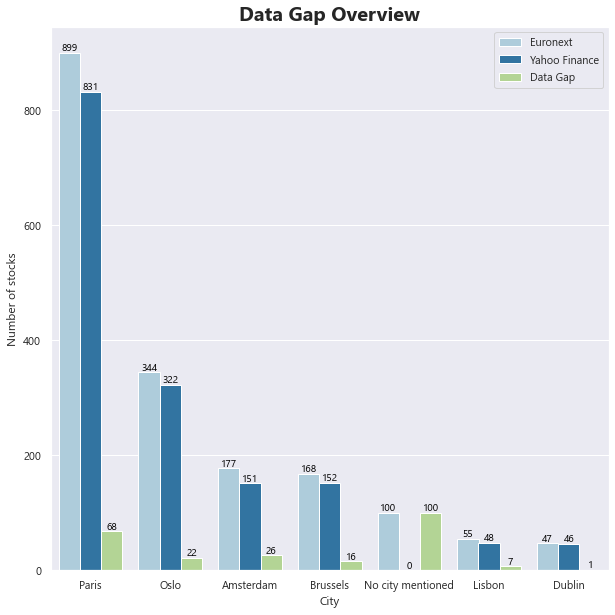

In [106]:
sns.set_theme(style='darkgrid', palette='Paired', font='Segoe UI')
df = df.sort_values('Euronext', ascending=False)
fig, ax1 = plt.subplots(figsize=(10, 10))
unpivot = df.melt(id_vars='City')
# Add bar plot for data retrieved
sns.barplot(x='City', y='value', hue='variable', data=unpivot, ax=ax1)
# Remove title for legend on barplot
handles, labels = ax1.get_legend_handles_labels()
ax1.legend(handles=handles, labels=labels, loc='upper right')
# Add title
ax1.set_title("Data Gap Overview", weight = 'bold').set_fontsize('20')
# Rename y-axis
ax1.set_ylabel('Number of stocks')
# Iterate through to add data labels
for p in ax1.patches:
    ax1.text(p.get_x() + p.get_width()/2., p.get_height(), int(p.get_height()),
             fontsize=10, color='black', ha='center', va='bottom')


In [121]:
# Get the start date, end date and general data quality dimensions of the data
# This is stock prices so I always expect them to be positive
stock_detail['stock_name']

0               1000MERCIS
1             2020 BULKERS
2                    2CRSI
3              2MX ORGANIC
4           2MX ORGANIC BS
               ...        
1785           ZCI LIMITED
1786         ZENITH ENERGY
1787    ZENOBE GRAMME CERT
1788                 ZWIPE
1789     �RN SOFTWARE HLD.
Name: stock_name, Length: 1790, dtype: object